<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

# Rediscovering Pokemon GO and the Main Series Games


<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

In [1]:
# Standard imports
import pandas as pd
# Vis imports
import matplotlib.pyplot as plt
import seaborn as sns
# Stats imports
from scipy.stats import spearmanr
# Custom imports
import wrangle
import explore

## Project Goal

- To perform exploratory analysis on the Pokemon main series games and mobile game Pokemon GO

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## Acquire and Prepare Data

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

The final dataframe df_best_attack_set is a new dataframe made from joining data from Pokemon GO and a Pokemon dataset on kaggle for the main series pokemon games.
In this dataset you will see that ER or Equivalent Rating was changed to Battle_Stat. This makes it a bit easier to follow for those not as familiar with the way stats work in the Pokemon games. If you would like further explanation please refer to the README on GitHub. 

In [2]:
# This function reads in 3 dataframes from csv's and prepares them for exploration.
df, df1, df_best_attack_set = wrangle.wrangle_df()

In [3]:
df.head()

,Pokemon,Fast Move,Charged Move,DPS,TDO,Battle_Stat,CP
0,Mega Mewtwo Y,Confusion,Psystrike,26.355,999.7,65.41,5610
1,Mega Mewtwo Y,Psycho Cut,Psystrike,26.207,994.1,65.04,5610
2,Mega Mewtwo X,Confusion,Psystrike,25.513,967.8,63.32,5429
3,Shadow Mewtwo,Confusion,Psystrike,25.400,662.7,57.41,4178
4,Mega Mewtwo X,Psycho Cut,Psystrike,25.380,962.8,62.99,5429


In [4]:
df1.head()

,#,Pokemon,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df_best_attack_set.head()

,Pokemon,DPS,TDO,Battle_Stat,Max_CP_Lv40,Fast_Move,Charged_Move,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Flabébé,7.460,99.2,41.2,1063,Vine Whip,Dazzling Gleam,669.0,Fairy,NaN,303.0,44.0,38.0,39.0,61.0,79.0,42.0,6.0,False
1,5th Anniversary Pikachu,8.366,81.2,47.5,938,Thunder Shock,Wild Charge,25.0,Electric,NaN,320.0,35.0,55.0,40.0,50.0,50.0,90.0,1.0,False
2,Abomasnow,12.094,322.3,570.1,2362,Razor Leaf,Weather Ball Ice,460.0,Grass,Ice,494.0,90.0,92.0,75.0,92.0,85.0,60.0,4.0,False
3,Abra,11.707,85.1,136.5,1342,Zen Headbutt,Psyshock,63.0,Psychic,NaN,310.0,25.0,20.0,15.0,105.0,55.0,90.0,1.0,False
4,Absol,15.134,252.4,874.8,2526,Snarl,Return,359.0,Dark,NaN,465.0,65.0,130.0,60.0,75.0,60.0,75.0,3.0,False


## Acquire and Prepare Takeaways

- We ended up with 3 different dataframes to look at.
- The data was not split as we are not doing any modeling for this project.
- ER was changed to Battle_Stat to make it a bit more intutive to understand.
- The dataframe best_attack_set takes the optimal moveset for the max Battle_Stat for each pokemon and joins with the data from the main series Pokemon games to get a more complete picture of the data.

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## Exploration

<hr style="border-top:10px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:10px solid Blue; margin-top: 0px; margin-bottom: 2px">

## What is the percentage breakdown of primary and secondary types?

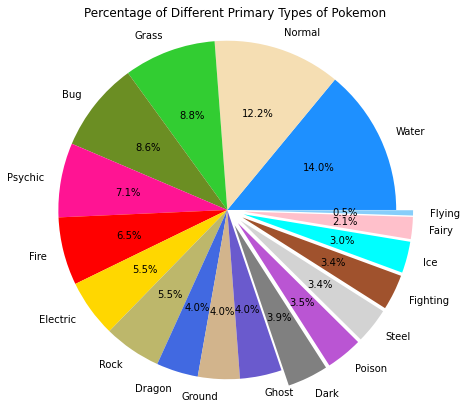

In [6]:
explore.primary_type_pie_chart()

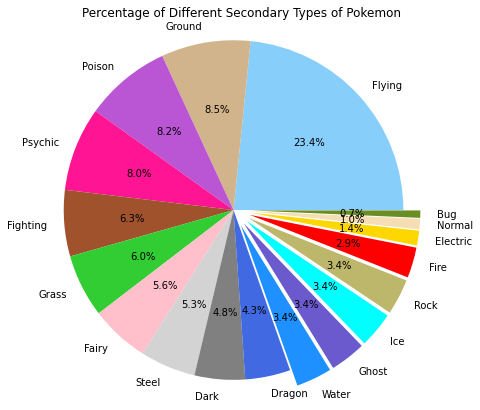

In [7]:
explore.secondary_type_pie_chart()

## Pie Chart Takeaways
- Water is the most common primary type.
- Flying is the least common primary type.
- Flying is the most common secondary type.
- Bug is the least common secondary type.

## Lets look at the correlations in the data.

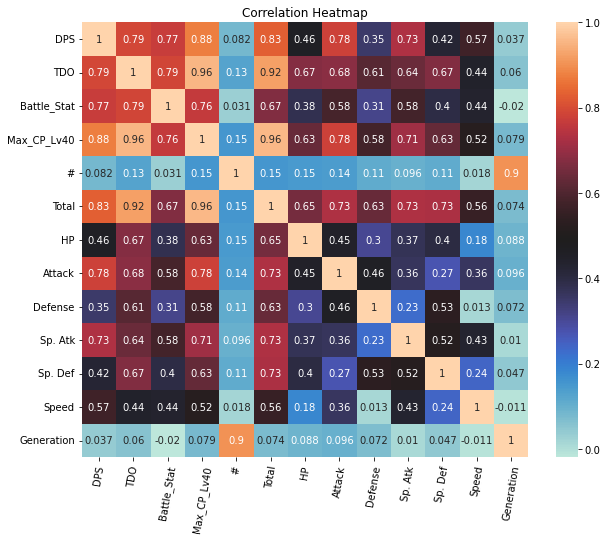

In [8]:
explore.corr_heatmap(df_best_attack_set)

## Correlation Heatmap Takeaways
- Max_CP_Lv40 has a very strong correlation with TDO, Battle_Stat, Total, Attack, and Sp Atk.
- Generation doesn't have a good correlation with any data associated with stats.

## Lets make a function that will take in a pokemon name and return its stats with the optimal moveset for the highest battle stat.

In [ ]:
explore.find_best_moveset(df_best_attack_set)

## Its not perfect but it works!!

## This could be used as the fondation to develop an app that can assist new and professional level players for Pokemon Go.

## What pokemon has the highest and lowest cp?

In [ ]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.max()]

In [ ]:
df_best_attack_set[df_best_attack_set.Max_CP_Lv40 == df_best_attack_set.Max_CP_Lv40.min()]

## Takeaways
- Eternamax Eternatus has the highest CP, however it is not yet implemented in the game.
- There is a three way tie for the lowest CP between Feebas, Magikarp, and Shadow Magikarp.

## What "S tier pokemon" in Pokemon Go has the highest and lowest Battle Stat?


In [ ]:
S_tier_attackers = ['Kartana', 'Terrakion', 'Shadow Metagross', 'Shadow Machamp',
                    'Shadow Mewtwo', 'Shadow Salamence', 'Shadow Dragonite', 'Mega Latios',
                    'Mega Gengar', 'Mega Charizard Y', 'Shadow Mamoswine']

In [ ]:
df_S_tier_attackers = df_best_attack_set[(df_best_attack_set.Pokemon == 'Kartana') | (df_best_attack_set.Pokemon == 'Terrakion') |
                  (df_best_attack_set.Pokemon == 'Shadow Metagross') | (df_best_attack_set.Pokemon == 'Shadow Machamp') |
                  (df_best_attack_set.Pokemon == 'Shadow Mewtwo') | (df_best_attack_set.Pokemon == 'Shadow Salamence') |
                  (df_best_attack_set.Pokemon == 'Shadow Dragonite') | (df_best_attack_set.Pokemon == 'Mega Latios') |
                  (df_best_attack_set.Pokemon == 'Shadow Gengar') | (df_best_attack_set.Pokemon == 'Mega Charizard Y') |
                  (df_best_attack_set.Pokemon == 'Shadow Mamoswine')]

In [ ]:
df_S_tier_attackers

In [ ]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.max()]

In [ ]:
df_S_tier_attackers[df_S_tier_attackers.Battle_Stat == df_S_tier_attackers.Battle_Stat.min()]

## S Tier Pokemon Takeaways
- Shadow Mewtwo has the highest Battle_Stat for S Tier Pokemon.
- Shadow Machamp has the lowest Battle_Stat for S Tier Pokemon.

## What pokemon has the highest and lowest average battle stat between all of their move sets?

In [ ]:
df.groupby('Pokemon').mean('Battle_Stat').nlargest(1, columns = 'Battle_Stat')


In [ ]:
df.groupby('Pokemon').mean('Battle_Stat').nsmallest(1, columns = 'Battle_Stat')

## Highest and Lowest Average Battle Stat Takeaways
- Mega Mewtwo has the best average Battle Stat between all movesets.
- Shadow Magikarp has the worst average Battle Stat between all movesets.

## What primary type has the highest average total stats?

In [ ]:
explore.pri_type_avg_stats(df_best_attack_set)

## Lets compare the highest and lowest average total stats. (Dragon vs Bug)

In [ ]:
explore.dragon_vs_bug_atk_def_vis(df_best_attack_set)

In [ ]:
explore.dragon_vs_bug_spatk_spdef_vis(df_best_attack_set)

## Let's look at total stats by generation

In [ ]:
explore.stats_by_gen_vis(df1)

In [ ]:
explore.top_10_types_by_generation(df1)

In [ ]:
df_box = explore.box_plot(df1)

## Lets look at some of the extreme outliers

In [ ]:
df_box[df_box.HP <= 5]

In [ ]:
df_box[df_box.HP >= 200]

In [ ]:
df_box[df_box.Speed >= 160]